In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datosBalanceados.csv')
df.head()

,year,suicides_no,population,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,...,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,suicides/100k pop
0,1987,21,312900,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,1987,16,308000,2.156625e+09,796.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
2,1987,14,289700,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,1987,1,21800,2.156625e+09,796.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,1987,9,274300,2.156625e+09,796.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1


## Probabilidad de Suicidio

Se usará suicides/100k pop como independiente y todas las demas columnas del dataset como dependientes. Se usará el modelo de regresión lineal para predecir la probabilidad de suicidio en un país.

In [47]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

In [48]:
# separar en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)

        year  suicides_no  population  gdp_for_year  gdp_per_capita  \
90653   2009         1012      634006  1.177719e+12    24796.651776   
807     2003          456     2845955  1.275870e+11     3668.000000   
92706   1996          273      174461  8.150852e+10     9819.336675   
66676   1989           40       39328  3.042379e+10    12179.489296   
50434   2005           26       50862  1.692250e+10     7916.000000   
...      ...          ...         ...           ...             ...   
128106  2011            9        5247  4.899197e+09    10397.511518   
103694  1999          275      188382  4.749694e+10     4984.132173   
860     2007          155     4601874  2.875305e+11     7918.000000   
15795   2010            0       30688  2.588176e+09     7806.000000   
121958  2009          909      498643  8.636103e+11    20765.943815   

        age_15-24  age_25-34  age_35-54  age_5-14  age_55-74  ...  \
90653       False      False      False     False      False  ...   
807      

In [49]:
# normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 1.08608079  0.14691811 -0.16469287 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 0.2695891  -0.13679586  0.60107625 ... -0.07448072 -0.13329367
  -0.04463389]
 [-0.68298453 -0.23017654 -0.32378576 ... -0.07448072 -0.13329367
  -0.04463389]
 ...
 [ 0.8139169  -0.29038921  1.20896936 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 1.22216274 -0.36948214 -0.37355948 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 1.08608079  0.09435959 -0.21155507 ... -0.07448072 -0.13329367
  -0.04463389]]
[[ 0.94999884 -0.25518011 -0.23858333 ... -0.07448072 -0.13329367
  -0.04463389]
 [-0.41082064 -0.30008448 -0.16384088 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 1.49432664 -0.25211844 -0.30301743 ... -0.07448072 -0.13329367
  -0.04463389]
 ...
 [-0.81906648 -0.27252952 -0.32672012 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 0.40567105 -0.32712915 -0.25713392 ... -0.07448072 -0.13329367
  -0.04463389]
 [-0.41082064 -0.32202638 -0.35245326 ... -0.07448072 -0.13329367
  -0.04463389]]


In [50]:
from sklearn.linear_model import LogisticRegression

# Instanciando el modelo con n_jobs=-1
logisticRegr = LogisticRegression(n_jobs=-1)

logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9594708266421962


0.9594708266421962


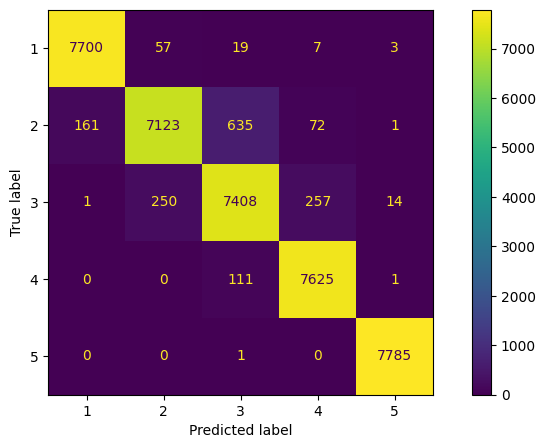

In [51]:
# graficar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

conf = confusion_matrix(y_test, logisticRegr.predict(X_test))
accuracy = accuracy_score(y_test, logisticRegr.predict(X_test))
print(accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
disp.plot(ax=ax)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logisticRegr.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      7786
           2       0.96      0.89      0.92      7992
           3       0.91      0.93      0.92      7930
           4       0.96      0.99      0.97      7737
           5       1.00      1.00      1.00      7786

    accuracy                           0.96     39231
   macro avg       0.96      0.96      0.96     39231
weighted avg       0.96      0.96      0.96     39231



## Mejoramiento del modelo

In [53]:
# Mejorar el modelo con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que quieres ajustar
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'], 
    'max_iter': [100]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(grid_search.best_params_)

# Usar el mejor modelo para predecir
best_model = grid_search.best_estimator_
score = best_model.score(X_test, y_test)
print(score)

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9679080319135378


0.9679080319135378


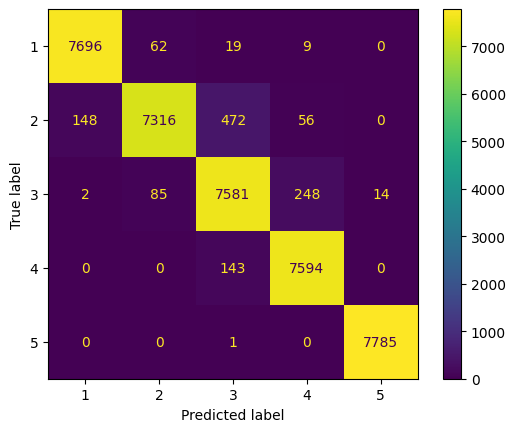

In [54]:
conf = confusion_matrix(y_test, best_model.predict(X_test))
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_model.classes_)
disp.plot()

In [55]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      7786
           2       0.98      0.92      0.95      7992
           3       0.92      0.96      0.94      7930
           4       0.96      0.98      0.97      7737
           5       1.00      1.00      1.00      7786

    accuracy                           0.97     39231
   macro avg       0.97      0.97      0.97     39231
weighted avg       0.97      0.97      0.97     39231



In [56]:
# Obtener y mostrar los coeficientes
feature_names = X.columns
coefficients = logisticRegr.coef_[0]
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)


In [57]:
feature_importance.head(15)

,Coefficient
population,16.688413
country_United States,2.446741
gdp_per_capita,1.827576
country_Colombia,1.642635
country_Mexico,1.603982
country_Chile,1.563146
country_Turkmenistan,1.557224
country_Costa Rica,1.547998
country_Guatemala,1.517188
country_Brazil,1.514485


In [58]:
# Obtener y mostrar los coeficientes
feature_names = X.columns
coefficients = best_model.coef_[0]  # Usamos el mejor modelo después de GridSearchCV
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Ordenar por importancia (valor absoluto del coeficiente)
feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='abs_coeff', ascending=False)

# Mostrar las 10 variables más influyentes
print(feature_importance_sorted.head(10))

                            Coefficient  abs_coeff
population                    41.071608  41.071608
suicides_no                  -39.728102  39.728102
country_Republic of Korea    -23.054264  23.054264
age_75+                      -22.150498  22.150498
generation_Silent            -18.607861  18.607861
country_Suriname             -15.953887  15.953887
country_Hungary              -15.158054  15.158054
country_Lithuania            -14.740185  14.740185
generation_G.I. Generation   -14.491030  14.491030
age_35-54                    -14.487849  14.487849


Se obtuvieron las variables más influyentes en el modelo de regresión lineal. Es importante mencionar que esta lista toma en cuenta solo el valor abosoluto. 

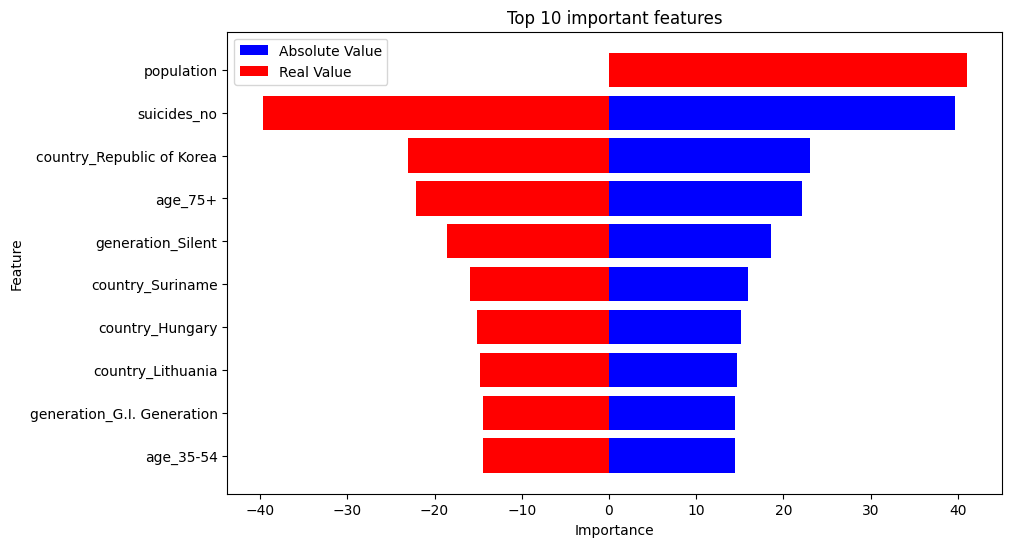

In [59]:
# Seleccionar las 10 características más importantes
top_features = feature_importance_sorted.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))

# Crear barras para el valor absoluto
plt.barh(top_features.index, top_features['abs_coeff'], color='blue', label='Absolute Value')

# Crear barras para el valor real
plt.barh(top_features.index, top_features['Coefficient'], color='red', label='Real Value')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 important features')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.legend()
plt.show()

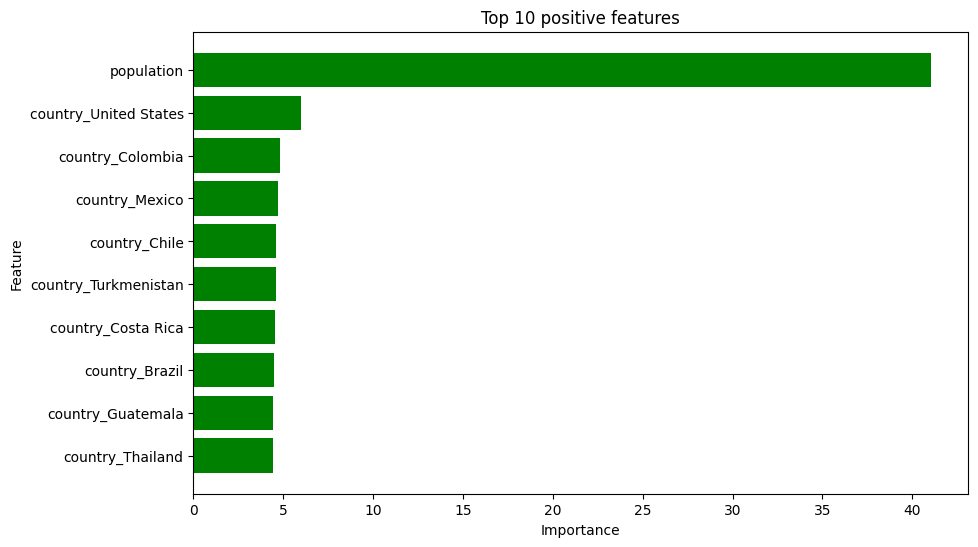

In [60]:
# encontrar a partir del modelo, los 10 features más importantes positivos. 
# Estos features son los que más influyen en el aumento de la tasa de suicidios.
# Graficarlos en un gráfico de barras.

positive_features = feature_importance_sorted[feature_importance_sorted['Coefficient'] > 0]
top_positive_features = positive_features.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_positive_features.index, top_positive_features['Coefficient'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 positive features')
plt.gca().invert_yaxis()
plt.show()

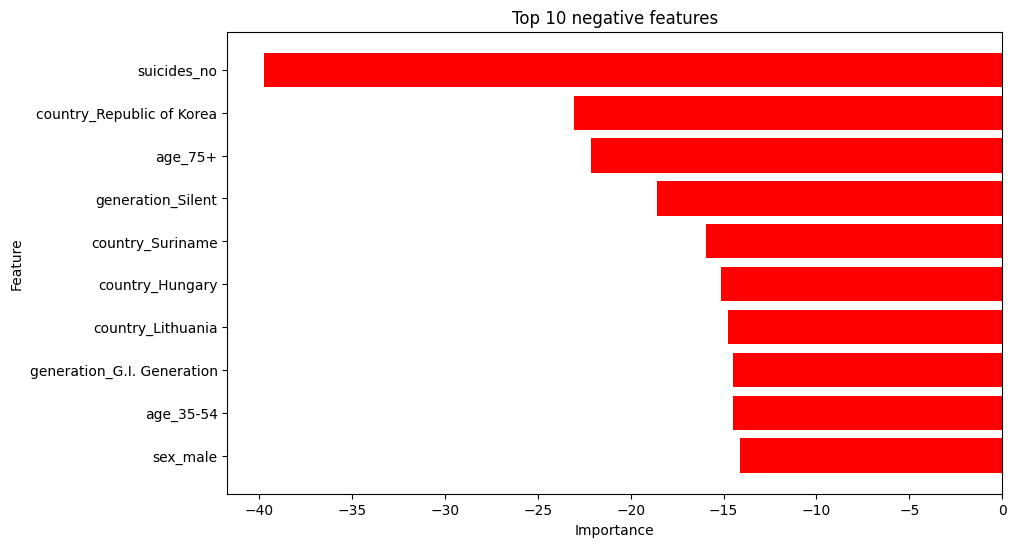

In [61]:
# obtener los 10 features más importantes negativos.
# Estos features son los que más influyen en la disminución de la tasa de suicidios.
# Graficarlos en un gráfico de barras.

negative_features = feature_importance_sorted[feature_importance_sorted['Coefficient'] < 0]
top_negative_features = negative_features.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_negative_features.index, top_negative_features['Coefficient'], color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 negative features')
plt.gca().invert_yaxis()
plt.show()


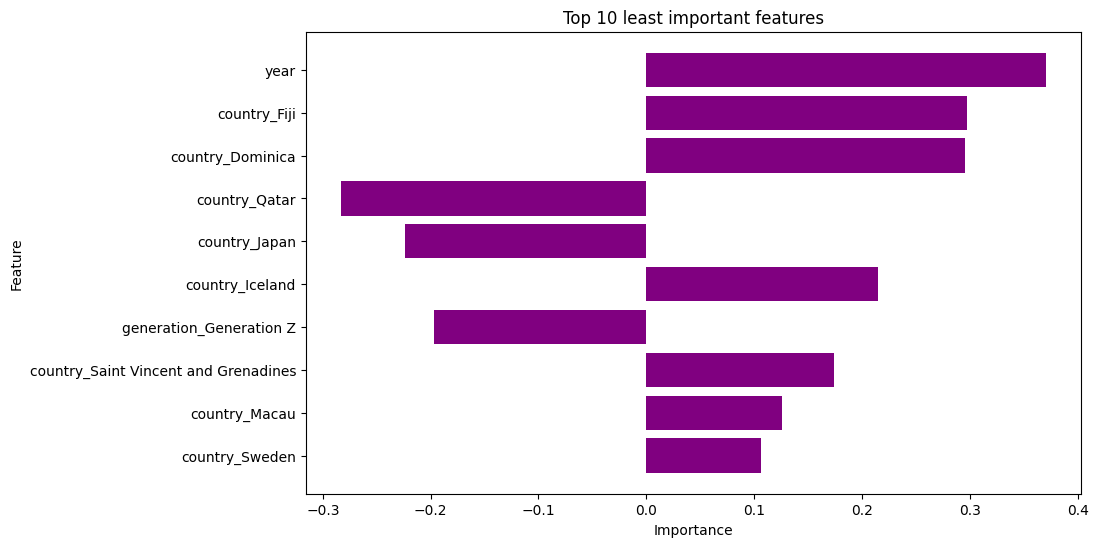

In [62]:
# obten las 10 features menos importantes
# Graficarlos en un gráfico de barras.

least_important_features = feature_importance_sorted.tail(10)

plt.figure(figsize=(10, 6))
plt.barh(least_important_features.index, least_important_features['Coefficient'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 least important features')
plt.gca().invert_yaxis()
plt.show()